In [453]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVR,SVC
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectKBest,f_classif
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [454]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df[df.columns[:13]]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd


In [455]:
df[df.columns[13:]]

,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [456]:
#check data shape
df.shape

(907, 27)

In [457]:
#check metadata of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [458]:
#check null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [459]:
#deleting columns who have too many null values
df.drop(columns=['name','country','country_long','latitude','generation_gwh_2013','generation_gwh_2019','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh','owner','source','geolocation_source'],axis=1,inplace=True)

cant go further with this columns cause they have too many null values and replacing all this values is likely to  filling wrong values

In [460]:
#printig dataframe after deleting columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(2)
memory usage: 71.0+ KB


In [461]:
#replace null values with median
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

I am using median to replace null values as it is appropriate and not biased

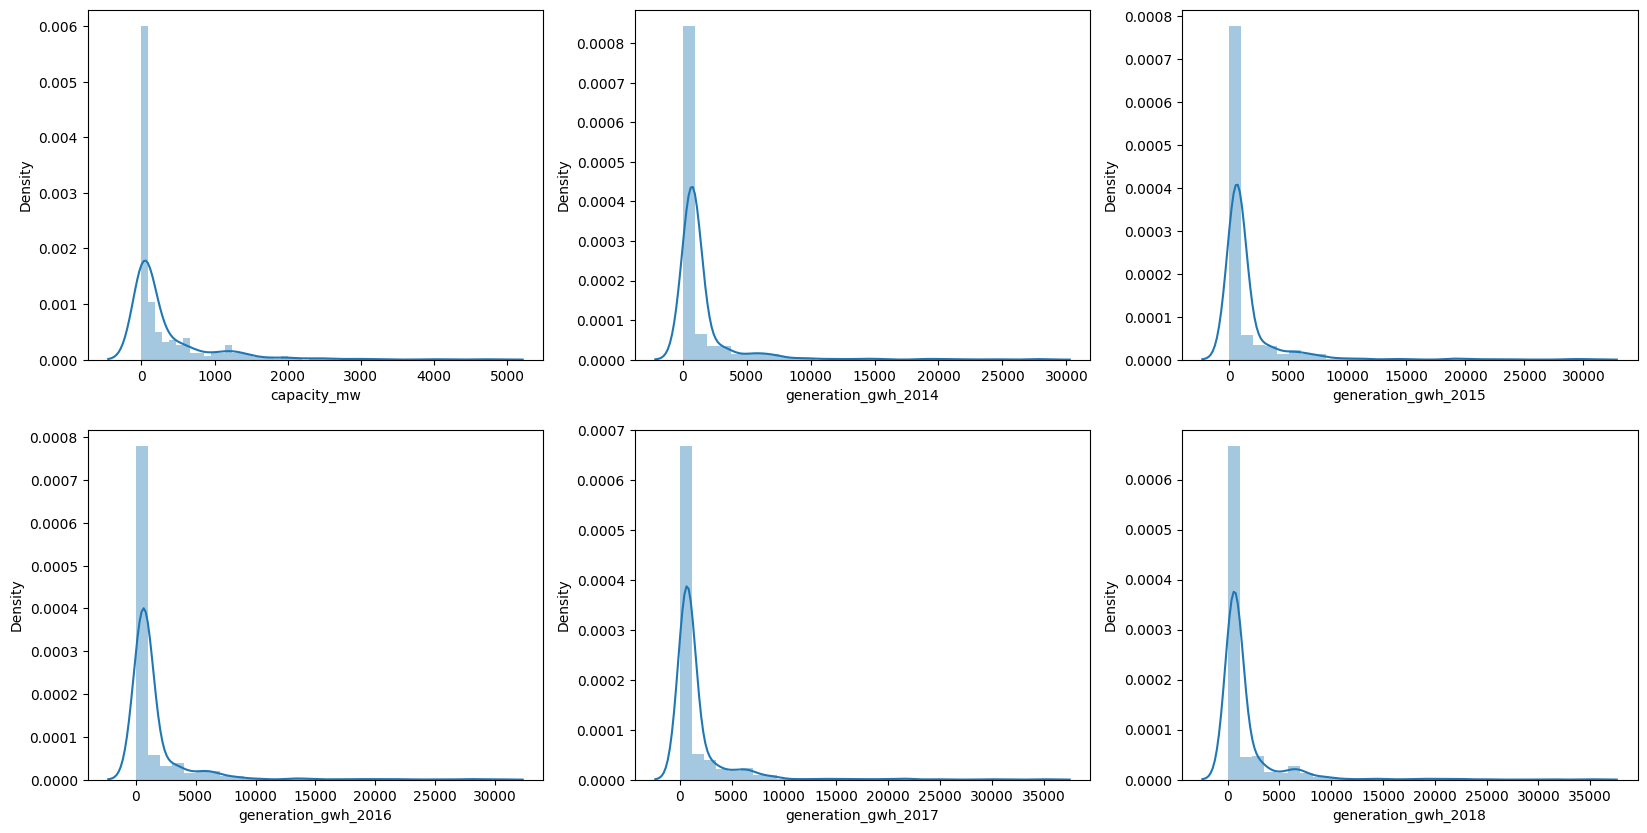

In [462]:
#plot distribution of continuos data
cont_f=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
plt.figure(figsize=(20,10))
plotno=1
for i in cont_f:
  plt.subplot(2,3,plotno)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()


excluding categorical feature all other feature's are right skewed

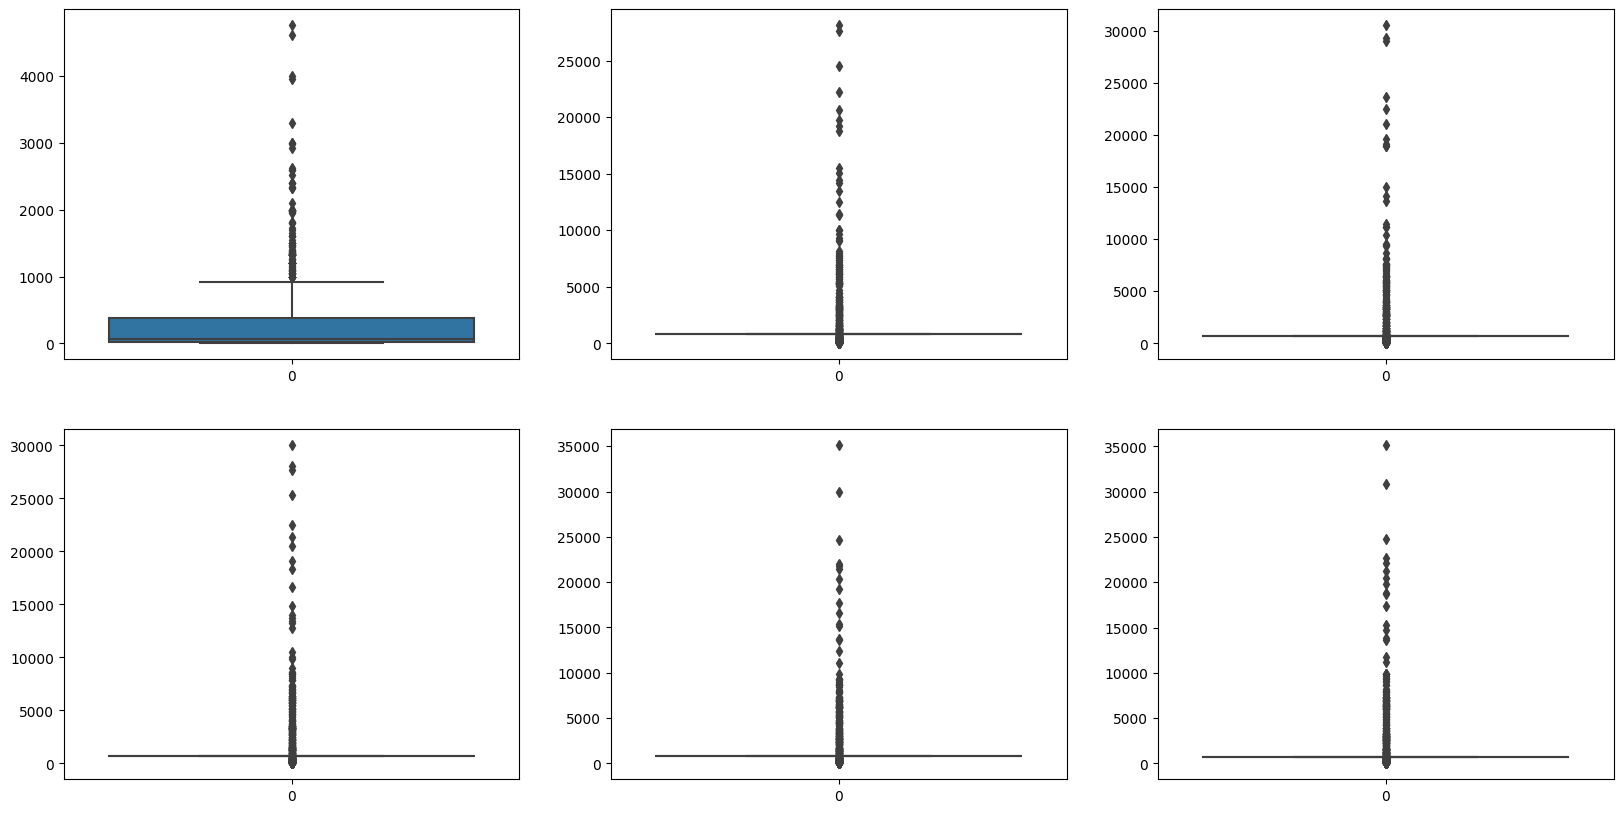

In [463]:
#check outliers
plt.figure(figsize=(20,10))
plotno=1
for i in cont_f:
  plt.subplot(2,3,plotno)
  sns.boxplot(df[i])
  #plt.xlabel(i)
  plotno+=1
plt.show()


In [464]:
encode_f=['gppd_idnr','primary_fuel']

In [465]:
#encoding feature
for i in encode_f:
  df[i]=LabelEncoder().fit_transform(df[i])

In [466]:
nan_f=['commissioning_year','longitude']

In [467]:
#filling nan values of selected features
impute=KNNImputer()
df[nan_f]=impute.fit_transform(df[nan_f])

In [468]:
#check skewness
df.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
longitude              1.093800
primary_fuel           0.472251
commissioning_year    -1.078549
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

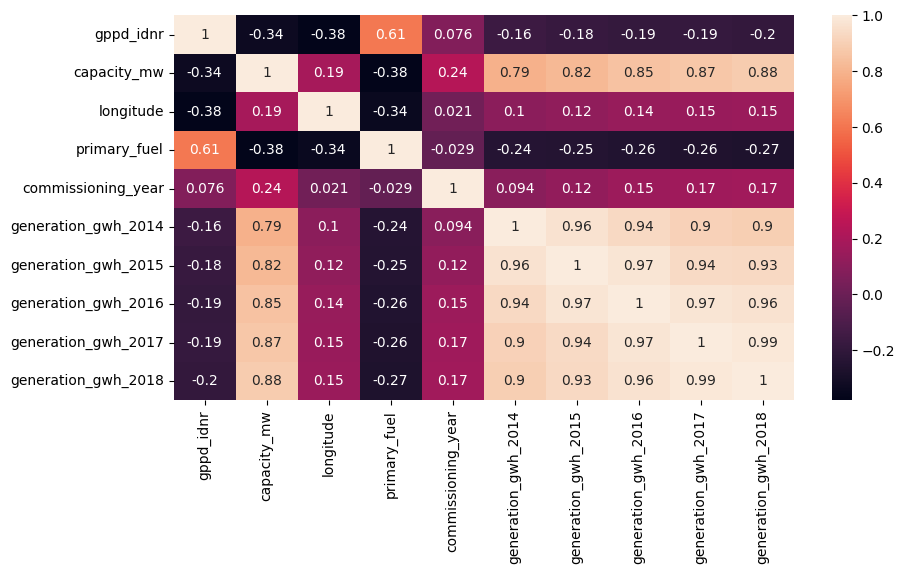

In [469]:
#check correalation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [470]:
# pwt=PowerTransformer(method='yeo-johnson',standardize=False)
# df[cont_f]=pwt.fit_transform(df[cont_f])

In [471]:
# zscore=zscore(df[cont_f])
# z_scr=np.abs(zscore)
# filtered=(z_scr < 3).all(axis=1)
# df=df[filtered]

In [520]:
X=df.drop(columns=['capacity_mw'],axis=1)
y=df['capacity_mw']

In [473]:
vif=pd.DataFrame()
vif['feature']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,feature,score
0,gppd_idnr,6.781759
1,longitude,306.710801
2,primary_fuel,5.015040
3,commissioning_year,338.096904
4,generation_gwh_2014,18.326438
5,generation_gwh_2015,42.827310
6,generation_gwh_2016,55.756265
7,generation_gwh_2017,67.457808
8,generation_gwh_2018,49.325824


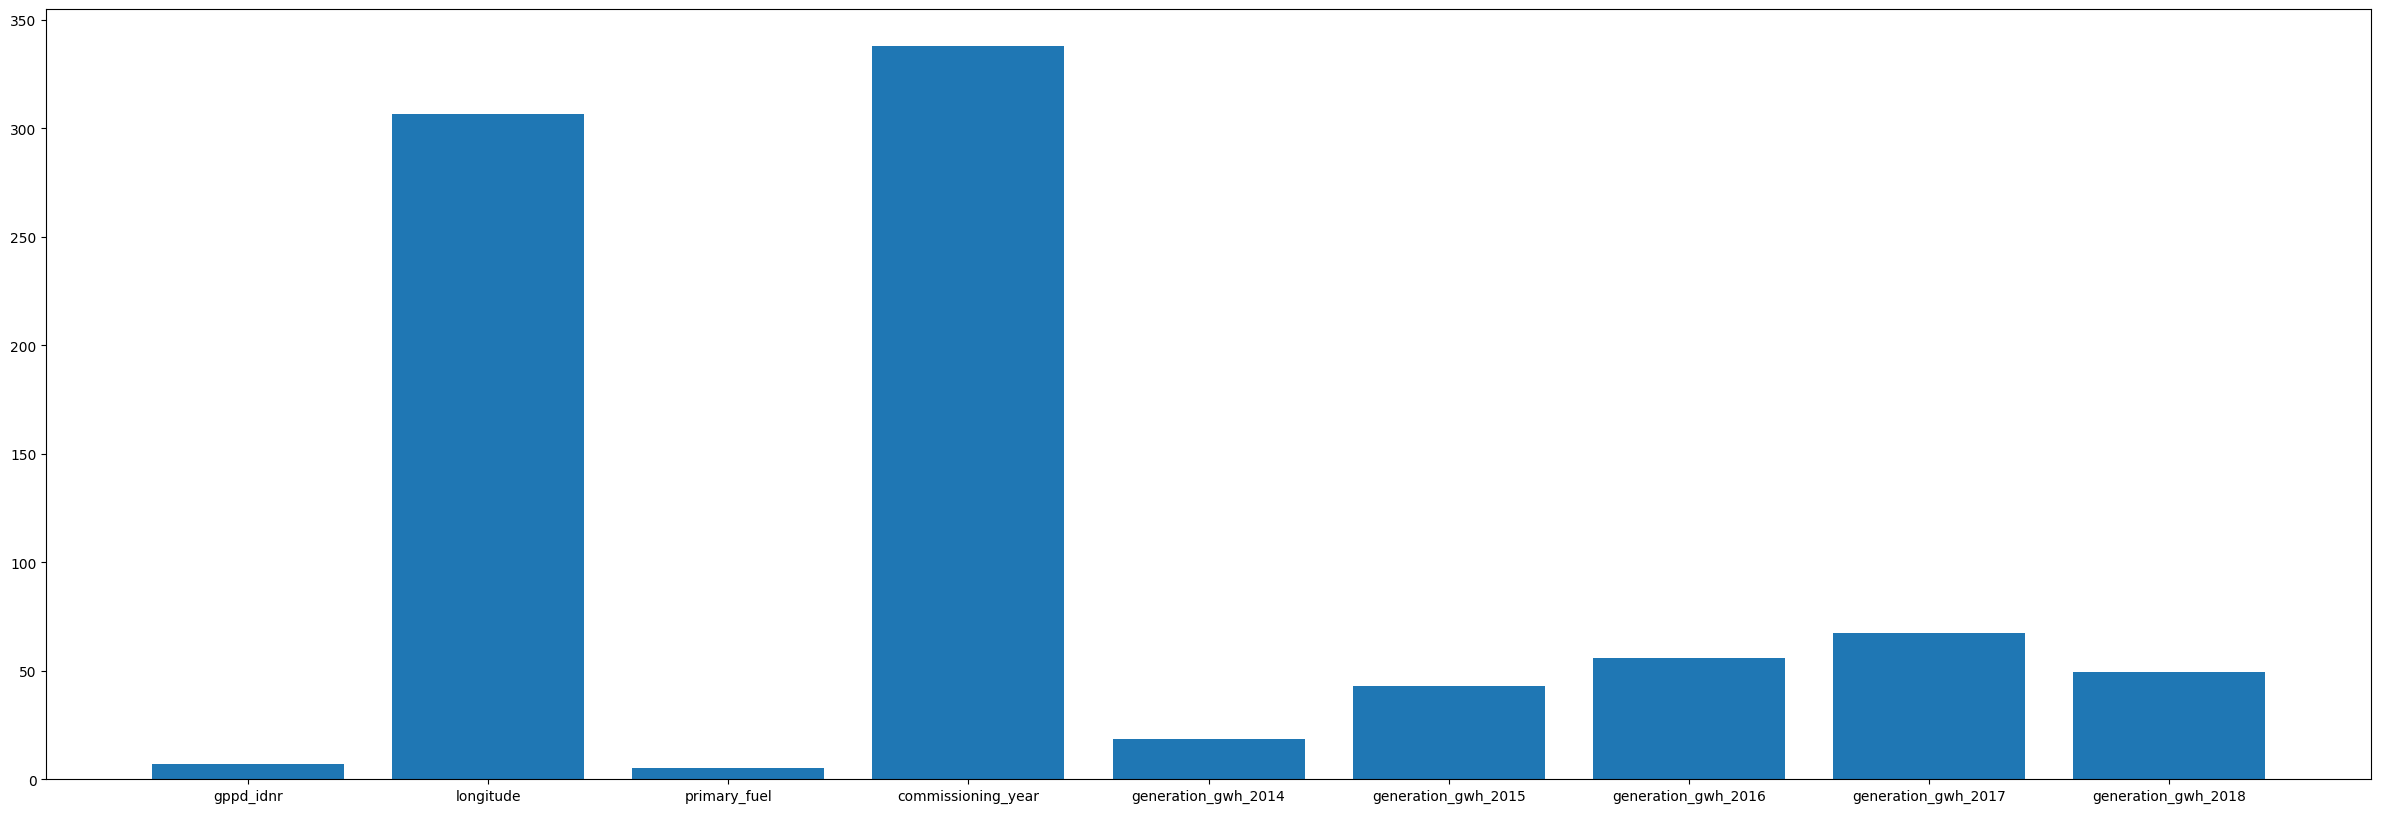

In [474]:
plt.figure(figsize=(30,10))
plt.bar(vif['feature'],vif['score'])
plt.show()

In [475]:
df.drop(columns=['longitude','commissioning_year'],axis=1,inplace=True)

In [521]:
#feature scaling
scal=StandardScaler()
x_scal=scal.fit_transform(X)

In [522]:
#finding best random state
maxscr=0
ind=0
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.20,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  scr=r2_score(y_test,y_pred)
  if scr > maxscr:
    maxscr=scr
    ind=i

print(f'maxscore {maxscr} at index {ind}')

maxscore 0.9166058769299933 at index 96


In [523]:
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.20,random_state=41)

**Model Building**

In [524]:
#bulding Linearregression
lr=LinearRegression()
lr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,lr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
lr_y_pred=lr.predict(x_test)
lr_test_score=r2_score(y_test,lr_y_pred)
print(lr_test_score)

--------------- Training Score ---------------
0.8370742685928001
--------------- Testing Score ---------------
0.722401630637733


In [525]:
#bulding KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,knr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
knr_y_pred=knr.predict(x_test)
knr_test_score=r2_score(y_test,knr_y_pred)
print(knr_test_score)

--------------- Training Score ---------------
0.9097128514769361
--------------- Testing Score ---------------
0.7532292095956132


In [526]:
#bulding SVR
svr=SVR()
svr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,svr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
svr_y_pred=svr.predict(x_test)
svr_test_score=r2_score(y_test,svr_y_pred)
print(svr_test_score)

--------------- Training Score ---------------
-0.08391118177366153
--------------- Testing Score ---------------
-0.18627353062765528


In [527]:
#bulding DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,dtr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
dtr_y_pred=dtr.predict(x_test)
dtr_test_score=r2_score(y_test,dtr_y_pred)
print(dtr_test_score)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.682265223784029


In [528]:
#bulding RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,rfr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
rfr_y_pred=rfr.predict(x_test)
rfr_test_score=r2_score(y_test,rfr_y_pred)
print(rfr_test_score)

--------------- Training Score ---------------
0.9827514577055536
--------------- Testing Score ---------------
0.7851804010874674


In [529]:
#bulding AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,abr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
abr_y_pred=abr.predict(x_test)
adr_test_score=r2_score(y_test,abr_y_pred)
print(adr_test_score)

--------------- Training Score ---------------
0.8901997575470006
--------------- Testing Score ---------------
0.7584054256816153


In [530]:

#bulding GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,gbr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
gbr_y_pred=gbr.predict(x_test)
gbr_test_score=r2_score(y_test,gbr_y_pred)
print(gbr_test_score)

--------------- Training Score ---------------
0.9747059851059203
--------------- Testing Score ---------------
0.7810225737377915


In [531]:
#bulding XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)
print('-'*15,'Training Score','-'*15)
print(r2_score(y_train,xgbr.predict(x_train)))
print('-'*15,'Testing Score','-'*15)
xgbr_y_pred=xgbr.predict(x_test)
xgbr_test_score=r2_score(y_test,xgbr_y_pred)
print(xgbr_test_score)

--------------- Training Score ---------------
0.9984077130151909
--------------- Testing Score ---------------
0.7400449767251831


**Cross Validation**

In [532]:
def cross_validation(ml_alg,x_train,y_train,test_scr,cv):
  cvscr=cross_val_score(ml_alg,x_train,y_train,cv=cv)
  print('\n',cvscr,'\n')
  print('cv.mean                            tesing score               difference')
  print(f'{(cvscr.mean())*100}          {(test_scr)*100}                 {(cvscr.mean()- test_scr)*100}')

In [533]:
#cross validatioin of linearregression
cross_validation(LinearRegression(),x_train,y_train,lr_test_score,5)


 [0.86191891 0.87097814 0.73815972 0.66791752 0.66051929] 

cv.mean                            tesing score               difference
75.98987167999664          72.2401630637733                 3.749708616223335


In [534]:
#cross validatioin of KNeighborsRegressor
cross_validation(KNeighborsRegressor(),x_train,y_train,knr_test_score,5)


 [0.82633397 0.90357774 0.73157813 0.8647248  0.79510167] 

cv.mean                            tesing score               difference
82.42632624962566          75.32292095956133                 7.103405290064336


In [535]:
#cross validatioin of svr
cross_validation(SVR(),x_train,y_train,svr_test_score,5)


 [-0.16731271 -0.07747052 -0.10434846 -0.1435145  -0.05679004] 

cv.mean                            tesing score               difference
-10.988724821497712          -18.62735306276553                 7.638628241267815


In [536]:
#cross validatioin of DecisionTreeRegressor
cross_validation(DecisionTreeRegressor(),x_train,y_train,dtr_test_score,5)


 [0.88088066 0.77448057 0.6785969  0.74780634 0.49356413] 

cv.mean                            tesing score               difference
71.50657201644006          68.2265223784029                 3.2800496380371635


In [537]:
#cross validatioin of RandomForestRegressor
cross_validation(RandomForestRegressor(),x_train,y_train,rfr_test_score,5)


 [0.89263405 0.91836316 0.76659031 0.83883286 0.79735898] 

cv.mean                            tesing score               difference
84.27558717075797          78.51804010874675                 5.757547062011225


In [538]:
#cross validatioin of AdaBoostRegressor
cross_validation(AdaBoostRegressor(),x_train,y_train,adr_test_score,5)


 [0.86053693 0.88040172 0.69840468 0.72352445 0.64651196] 

cv.mean                            tesing score               difference
76.18759477169704          75.84054256816152                 0.3470522035355028


In [539]:
#cross validatioin of GradientBoostingRegressor
cross_validation(GradientBoostingRegressor(),x_train,y_train,gbr_test_score,5)


 [0.90655899 0.9194863  0.74664482 0.73789577 0.76336631] 

cv.mean                            tesing score               difference
81.47904381374795          78.10225737377915                 3.376786439968804


In [540]:
#cross validatioin of XGBRegressor
cross_validation(XGBRegressor(),x_train,y_train,xgbr_test_score,5)


 [0.90162292 0.87781609 0.69879311 0.81198075 0.77874334] 

cv.mean                            tesing score               difference
81.37912429736751          74.00449767251831                 7.374626624849201


random forest regressor had good score in both condition with minimum difference

In [419]:
param_grid={'n_estimators':[100,200,300],
            'min_samples_split':[2,4,6],
            'min_samples_leaf':[1,2],
            'bootstrap':[True,False],
            'max_features':['sqrt', 'log2', None]

}
grid_search=GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [420]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [541]:
tunned_rfr=RandomForestRegressor(bootstrap=True,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=300)
tunned_rfr.fit(x_train,y_train)
y_pred=tunned_rfr.predict(x_test)
test_score=r2_score(y_test,y_pred)
print(f'Final tunned model testing score: {test_score*100}')

Final tunned model testing score: 79.28420844758035


In [542]:
#model saving
import pickle as pkl
pkl.dump(tunned_rfr,open('powerplant_powerpred_rfr.sav','wb'))

In [543]:
#loading model
model=pkl.load(open('powerplant_powerpred_rfr.sav','rb'))

In [546]:
cmp_df=pd.DataFrame()
cmp_df['y_test_capacity_mw']=y_test
cmp_df['y_pred_capacity_mw']=model.predict(x_test)
cmp_df.head(50)


,y_test_capacity_mw,y_pred_capacity_mw
294,139.20,134.347800
473,1200.00,853.299333
110,600.00,668.986133
491,25.20,50.364667
432,180.00,177.643033
40,28.00,28.356667
643,100.00,208.923437
455,1050.00,1348.700000
470,660.00,474.665000
616,15.20,22.093333


# Predicting Primary Fuel

In [425]:
df

,gppd_idnr,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,519,98.0,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,853,39.2,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,0,135.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,491,1600.0,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,822,3.0,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,891,25.5,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,539,80.0,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [426]:
XC=df.drop(columns=['primary_fuel','generation_gwh_2017'],axis=1)
yc=df['primary_fuel']

In [427]:
scal_c=StandardScaler()
xc_scal=scal_c.fit_transform(XC)

In [428]:
#finding best random state
maxscr_c=0
ind_c=0
for i in range(100):
  xc_train,xc_test,yc_train,yc_test=train_test_split(xc_scal,yc,test_size=0.20,random_state=i)
  lrc=LogisticRegression()
  lrc.fit(xc_train,yc_train)
  yc_pred=lrc.predict(xc_test)
  scr_c=accuracy_score(yc_test,yc_pred)
  if scr_c > maxscr_c:
    maxscr_c=scr_c
    ind_c=i

print(f'maxscore {maxscr_c} at index {ind_c}')

maxscore 0.7362637362637363 at index 0


In [429]:
xc_train,xc_test,yc_train,yc_test=train_test_split(xc_scal,yc,test_size=0.20,random_state=ind_c)

In [430]:
#bulding LogisticRegression
lrc=LogisticRegression()
lrc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,lrc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
lrc_y_pred=lrc.predict(xc_test)
lrc_test_score=accuracy_score(yc_test,lrc_y_pred)
print(lrc_test_score)

--------------- Training Score ---------------
0.6510344827586206
--------------- Testing Score ---------------
0.6428571428571429


In [431]:
#bulding kneighborsregressor
knc=KNeighborsClassifier()
knc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,knc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
knc_y_pred=knc.predict(xc_test)
knc_test_score=accuracy_score(yc_test,knc_y_pred)
print(knc_test_score)

--------------- Training Score ---------------
0.8524137931034482
--------------- Testing Score ---------------
0.7142857142857143


In [432]:
#bulding svc
svc=SVC()
svc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,svc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
svc_y_pred=svc.predict(xc_test)
svc_test_score=accuracy_score(yc_test,svc_y_pred)
print(svc_test_score)

--------------- Training Score ---------------
0.6937931034482758
--------------- Testing Score ---------------
0.6703296703296703


In [433]:
#bulding Decisiontreeclassifier
dtc=DecisionTreeClassifier()
dtc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,dtc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
dtc_y_pred=dtc.predict(xc_test)
dtc_test_score=accuracy_score(yc_test,dtc_y_pred)
print(dtc_test_score)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.6813186813186813


In [434]:
#bulding RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,rfc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
rfc_y_pred=rfc.predict(xc_test)
rfc_test_score=accuracy_score(yc_test,rfc_y_pred)
print(rfc_test_score)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.7692307692307693


In [435]:
#bulding AdboostClassifier
adc=AdaBoostClassifier()
adc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,adc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
adc_y_pred=adc.predict(xc_test)
adc_test_score=accuracy_score(yc_test,adc_y_pred)
print(adc_test_score)

--------------- Training Score ---------------
0.5158620689655172
--------------- Testing Score ---------------
0.47802197802197804


In [436]:
#bulding GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,gbc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
gbc_y_pred=gbc.predict(xc_test)
gbc_test_score=accuracy_score(yc_test,gbc_y_pred)
print(gbc_test_score)

--------------- Training Score ---------------
0.9972413793103448
--------------- Testing Score ---------------
0.7472527472527473


In [437]:
#bulding xgbclassifier
xgbc=XGBClassifier()
xgbc.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,xgbc.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
xgbc_y_pred=xgbc.predict(xc_test)
xgbc_test_score=accuracy_score(yc_test,xgbc_y_pred)
print(xgbc_test_score)

--------------- Training Score ---------------
1.0
--------------- Testing Score ---------------
0.7197802197802198


**Cross Validation**

In [438]:
def cross_validation(ml_alg,x_train,y_train,test_scr,cv):
  cvscr=cross_val_score(ml_alg,x_train,y_train,cv=cv)
  print('\n',cvscr,'\n')
  print('cv.mean',' '*10,'tesing score',' '*10,'difference',' '*10)
  print(f'{round((cvscr.mean())*100,2)}               {round((test_scr)*100,2)}                   {round((cvscr.mean()- test_scr)*100,2)}')

In [439]:
#cross validatioin of Logisticregression
cross_validation(LogisticRegression(),xc_train,yc_train,lrc_test_score,5)



 [0.66896552 0.60689655 0.68275862 0.62758621 0.64137931] 

cv.mean            tesing score            difference           
64.55               64.29                   0.27


In [440]:
#cross validatioin of SVC
cross_validation(SVC(),xc_train,yc_train,svc_test_score,5)



 [0.68275862 0.66206897 0.72413793 0.68275862 0.68965517] 

cv.mean            tesing score            difference           
68.83               67.03                   1.79


In [441]:
#cross validatioin of DecisiontreeClassifier
cross_validation(DecisionTreeClassifier(),xc_train,yc_train,dtc_test_score,5)



 [0.73103448 0.75862069 0.73793103 0.73793103 0.74482759] 

cv.mean            tesing score            difference           
74.21               68.13                   6.08


In [442]:
#cross validatioin of Kneighborsclassifier
cross_validation(KNeighborsClassifier(),xc_train,yc_train,knc_test_score,5)



 [0.76551724 0.73103448 0.7862069  0.75862069 0.8       ] 

cv.mean            tesing score            difference           
76.83               71.43                   5.4


In [443]:
#cross validatioin of Randomforestclassifier
cross_validation(RandomForestClassifier(),xc_train,yc_train,rfc_test_score,5)


 [0.77931034 0.7862069  0.8        0.82758621 0.77241379] 

cv.mean            tesing score            difference           
79.31               76.92                   2.39


In [444]:
#cross validatioin of GradientBoostingClassifier
cross_validation(GradientBoostingClassifier(),xc_train,yc_train,gbc_test_score,5)


 [0.7862069  0.77241379 0.7862069  0.79310345 0.77931034] 

cv.mean            tesing score            difference           
78.34               74.73                   3.62


In [445]:
#cross validatioin of XGBClassifier
cross_validation(XGBClassifier(),xc_train,yc_train,xgbc_test_score,5)


 [0.75862069 0.79310345 0.7862069  0.8        0.77931034] 

cv.mean            tesing score            difference           
78.34               71.98                   6.37


In [446]:
#cross validatioin of AdaBoostClassifer
cross_validation(AdaBoostClassifier(),xc_train,yc_train,adc_test_score,5)


 [0.42758621 0.43448276 0.52413793 0.42758621 0.52413793] 

cv.mean            tesing score            difference           
46.76               47.8                   -1.04


as per cv score and the difference between cv score and testing score xgbclassifier is perfect fit so i am training xgbclassifeir

In [447]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],}
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(xc_train, yc_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [448]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}

In [449]:
#bulding tuinned xgbclassifier
tunned_xgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=200)
tunned_xgb.fit(xc_train,yc_train)
print('-'*15,'Training Score','-'*15)
print(accuracy_score(yc_train,tunned_xgb.predict(xc_train)))
print('-'*15,'Testing Score','-'*15)
tunned_xgb_y_pred=tunned_xgb.predict(xc_test)
tunned_xgb_test_score=accuracy_score(yc_test,tunned_xgb_y_pred)
print(tunned_xgb_test_score)

--------------- Training Score ---------------
0.856551724137931
--------------- Testing Score ---------------
0.7527472527472527


In [450]:
#model saaving
pkl.dump(tunned_xgb,open('fuel_pred_xgb.sav','wb'))

In [547]:
#loading model
model_c=pkl.load(open('fuel_pred_xgb.sav','rb'))

In [550]:
cmp_df_c=pd.DataFrame()
cmp_df_c['primary_fuel']=yc_test
cmp_df_c['pred_primary_fuel']=model_c.predict(xc_test)
cmp_df_c.head(50)

,primary_fuel,pred_primary_fuel
63,1,3
126,7,7
219,3,3
266,7,7
547,3,3
562,7,7
455,1,1
597,1,1
882,3,1
420,5,5


In [551]:
accuracy_score(yc_test,model_c.predict(xc_test))

0.7527472527472527